The following is from [this article](https://medium.com/towards-data-science/outlier-detection-with-scikit-learn-and-matplotlib-a-practical-guide-382d1411b8ec) in Medium.

For this introductive guide, I will present several outlier detection methods, falling into these three main categories:

- **Graphical Approach:** detect outliers through data visualizations.
- **Statistical Approach:** detect outliers through statistical analysis and probability distributions.
- **Algorithmic Approach:** detect outliers through Machine Learning models.

<img src="outlier_detection.webp" style="width:650px;height:350px;background-color:white">

# 1. Graphical Approach

The Graphical Approach for outlier detection leverages the human brain’s remarkable ability to discern patterns. It makes use of visualization tools like Scatter Plots, Box Plots, and Heatmaps to provide a narrative of the data and allow Data Scientists to spot irregularities in the pattern.

## 1.1. Scatter Plot

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Generate synthetic data with outliers
np.random.seed(42)
normal_data = np.random.normal(loc=50, scale=10, size=100)
outliers = np.random.normal(loc=15, scale=5, size=10)

In [3]:
# Combine normal data with outliers
data = np.concatenate((normal_data, outliers))

In [4]:
range_1 = list(range(len(normal_data)))

In [5]:
range_2 = list(range(100, 100 + len(outliers)))

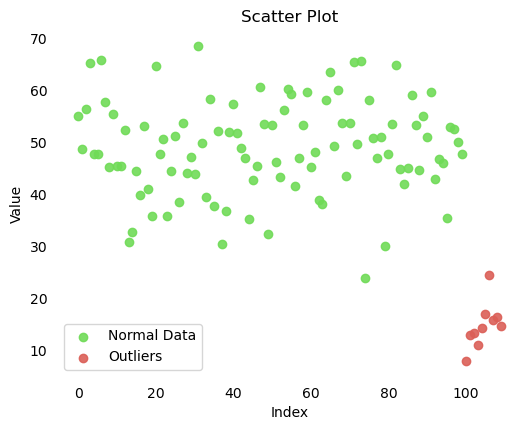

In [6]:
# Visualize data using a scatter plot
fig, ax = plt.subplots(figsize=(6, 4.5))
ax.scatter(
    range_1,
    normal_data,
    color=sns.color_palette("hls", 24)[7],
    alpha=0.9,
    label="Normal Data",
)
ax.scatter(
    range_2,
    outliers,
    color=sns.color_palette("hls", 24)[0],
    alpha=0.9,
    label="Outliers",
)
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.set_title("Scatter Plot")
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")
plt.legend()
plt.show()

## 1.2. Box Plot

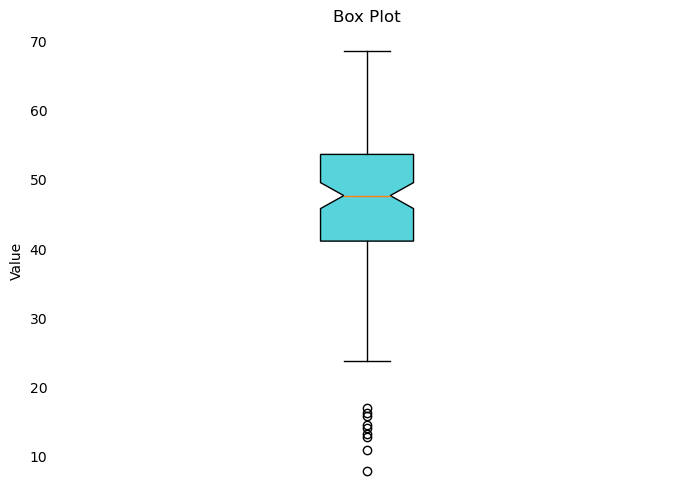

In [7]:
# Visualize data using a box plot
fig, ax = plt.subplots(figsize=(8, 6))
b_plot = ax.boxplot(data, vert=True, patch_artist=True, notch=True)
ax.set_ylabel("Value")
ax.set_title("Box Plot")
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")
ax.xaxis.set_ticks([])
# Color the box
for box in b_plot["boxes"]:
    box.set_facecolor(sns.color_palette("hls", 24)[12])

## 1.3. Violin Plot

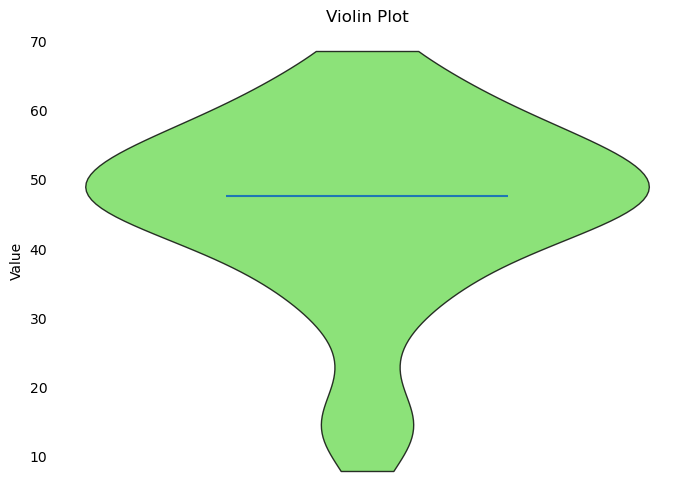

In [8]:
# Visualize data using a violin plot
fig, ax = plt.subplots(figsize=(8, 6))
v_plot = ax.violinplot(data, vert=True, showmedians=True, showextrema=False)
ax.set_ylabel("Value")
ax.set_title("Violin Plot")
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")
ax.xaxis.set_ticks([])
# Color the violin
for pc in v_plot["bodies"]:
    pc.set_facecolor(sns.color_palette("hls", 24)[7])
    pc.set_edgecolor("black")
    pc.set_alpha(0.8)

# 2. Statistical Approach

While the graphical approach is indeed of more immediate understanding, it comes with limitations. The main issue is they provide just qualitative but not quantitative results. For this reason, Scatter Plots, Box Plots, and Distribution Plots aid effective communication, but for consistent analysis, we must rely on mathematical rigor and statistical metrics.

Statistic tools such as Z-scores and Interquartile Range (IQR) assess data points using statistical parameters. They enable Data Scientists to systematically identify outliers by measuring how data points deviate from the expected statistical distribution.

Consider the Z-score, it measures how many standard deviations a data point lies away from the mean. Data points with Z-scores beyond a certain threshold can be flagged as outliers. Commonly a Z-score higher than 2 or 3 denotes an outlier.

In [9]:
# Generate a random dataset with outliers (100 normal points and 10 outliers)
np.random.seed(42)
data = np.concatenate(
    (
        np.random.normal(loc=50, scale=10, size=100),
        np.random.normal(loc=110, scale=20, size=10),
    )
)

In [10]:
# Calculate mean and standard deviation
mean_data = np.mean(data)
std_dev = np.std(data)

In [11]:
# Set Z-score threshold (typically 2 or 3)
z_score_threshold = 2

In [12]:
# Identify outliers using Z-score
outliers = [
    value for value in data if (value - mean_data) / std_dev > z_score_threshold
]

In [13]:
outliers

[101.58709354469282,
 103.14570966946461,
 106.77428576667981,
 118.08101713629077,
 147.7237180242106,
 113.49155625663678,
 115.15100781445528,
 108.51108168467665]

In a similar fashion, IQR relies on the range between the first and third quartiles of the data distribution. Any data points lying significantly beyond this range, are identified as outliers. Since sometimes the range between the first and third quartiles can be too strict, we can parametrically adjust it and consider, for example, the range between the first and ninth deciles.

Mathematically, data points outside the range Q1–1.5*IQR and Q3+1.5*IQR are commonly classified as outliers.

Alternatively, the Tukey’s Fence method is a parametrical approach based on the IQR range. It considers outliers all the data points that fall outside the range Q1-k*IQR and Q3+k*IQR, where k is a constant. Usually, k takes a value between 1.5 and 3.

In [14]:
# Generate a random dataset with outliers (100 normal points and 10 outliers)
np.random.seed(42)
data = np.concatenate(
    (
        np.random.normal(loc=50, scale=10, size=100),
        np.random.normal(loc=110, scale=20, size=10),
    )
)

In [15]:
# Calculate Q1 and Q3
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

In [16]:
Q1, Q3

(44.592729056643535, 58.012530490838756)

In [17]:
# Calculate IQR
IQR = Q3 - Q1
IQR

13.419801434195222

In [18]:
# Set lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [19]:
lower_bound, upper_bound

(24.463026905350702, 78.14223264213159)

In [20]:
# Identify outliers using IQR method
outliers = [value for value in data if value < lower_bound or value > upper_bound]

In [21]:
outliers

[23.802548959102555,
 81.69258515899172,
 101.58709354469282,
 103.14570966946461,
 93.95445461556761,
 106.77428576667981,
 118.08101713629077,
 147.7237180242106,
 113.49155625663678,
 115.15100781445528,
 108.51108168467665]

It is interesting to graphically visualize the difference between these three methods of detecting outliers inside the same dataset.

<img src="comparison_statistics_approaches.webp" style="width:750px;height:450px;background-color:white">

You can see how, in this case, the vanilla IQR method is too strict.

# 3. Algorithmic Approach

Finally, the Algorithmic Approach leverages the power of Machine Learning algorithms, overcoming the limitations of the simpler Statistical Approaches.

There exists a broad variety of Outlier Detection models, including the [Isolation Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html), [Local Outlier Factor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html), and the [One-Class Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html). They all provide reliable techniques to discern anomalies inside complex and multidimensional datasets. Unlike conventional statistical methods, these algorithms are better at understanding the intricate pattern of the data and defining more complex decision boundaries.

## 3.1. Isolation Forest

Isolation Forest relies on the principle of the more famous Random Forest, and, overall, of the Ensemble Learning Techniques. Isolation Forest’s core idea relies on the observation that anomalies are, by definition, rare and often require fewer steps to isolate within a tree structure, with respect to normal data. Hence, Isolation Forest builds an ensemble of decision trees, which isolate outliers more rapidly due to their sparse nature. By measuring the average path length of data points in these trees, Isolation Forest effectively quantify an anomaly score for each data point.

In [22]:
from sklearn.ensemble import IsolationForest

In [23]:
# Generate synthetic data with outliers
np.random.seed(42)
normal_data = np.random.normal(loc=100, scale=10, size=10000)
outliers = np.random.normal(loc=20, scale=5, size=1000)
data = np.concatenate((normal_data, outliers)).reshape(-1, 1)

In [24]:
np.random.shuffle(data)

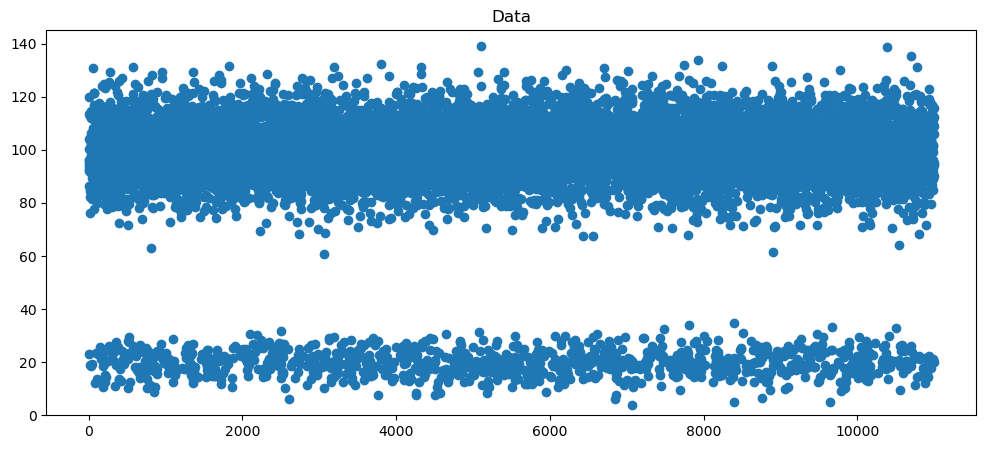

In [25]:
plt.figure(figsize=(12, 5))
plt.scatter(list(range(len(data))), data)
plt.ylim(0, 145)
plt.title("Data")
plt.show();

In [26]:
# Apply Isolation Forest for outlier detection
clf = IsolationForest(contamination="auto", random_state=42)
clf.fit(data)

IsolationForest(random_state=42)

In [27]:
# Predict outliers
outlier_preds = clf.predict(data)

In [28]:
normal_indices = np.where(outlier_preds == 1)

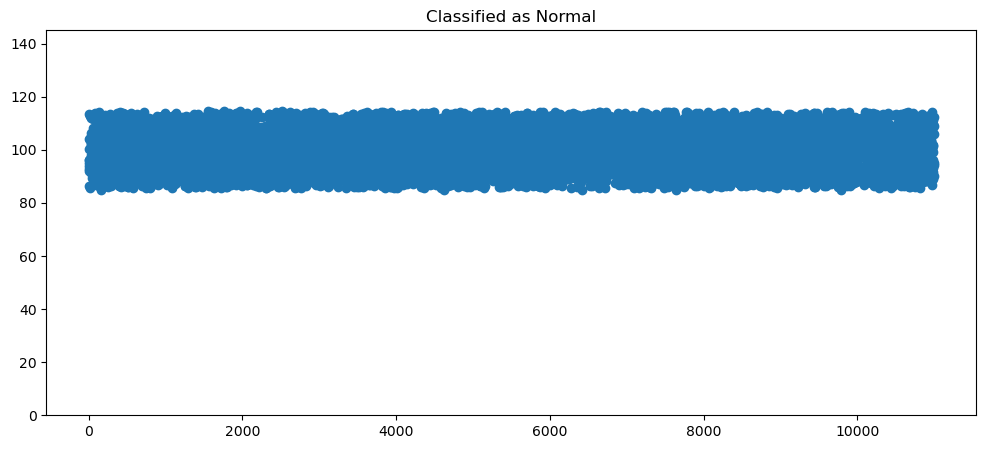

In [29]:
plt.figure(figsize=(12, 5))
plt.scatter(normal_indices[0], data[normal_indices[0]])
plt.ylim(0, 145)
plt.title("Classified as Normal")
plt.show();

In [30]:
outliers_indices = np.where(outlier_preds == -1)

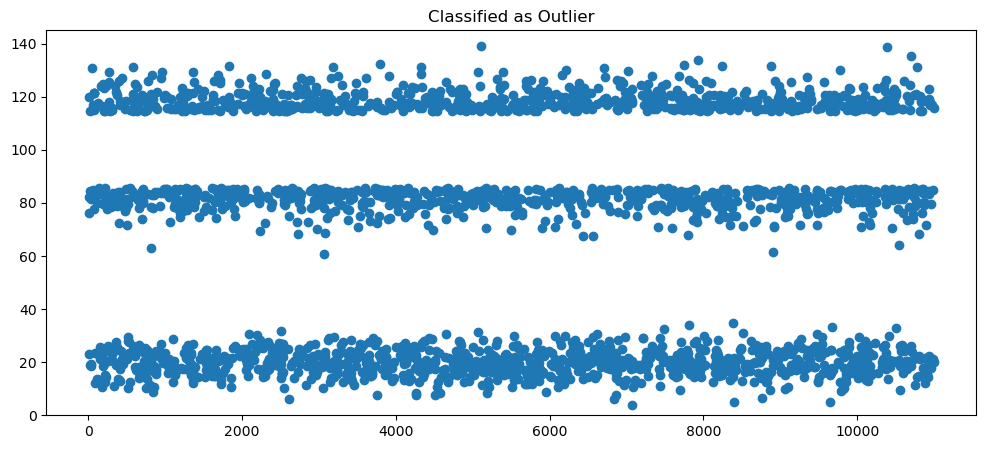

In [31]:
plt.figure(figsize=(12, 5))
plt.scatter(outliers_indices[0], data[outliers_indices[0]])
plt.ylim(0, 145)
plt.title("Classified as Outlier")
plt.show();

## 3.2. Local Outlier Factor (LOF)

Based on the idea that an anomaly is often more isolated, in the feature space, than its k nearest neighbors, Local Outlier Factor (LOF) assesses the local neighborhood of each data point, calculating its density concerning its neighbors.

Outliers often show significantly lower local densities compared to their neighbors, making them detectable through LOF algorithm.

In [32]:
from sklearn.neighbors import LocalOutlierFactor

In [33]:
# Generate synthetic data with outliers
np.random.seed(42)
normal_data = np.random.normal(loc=100, scale=10, size=10000)
outliers = np.random.normal(loc=20, scale=5, size=1000)
data = np.concatenate((normal_data, outliers)).reshape(-1, 1)

In [34]:
np.random.shuffle(data)

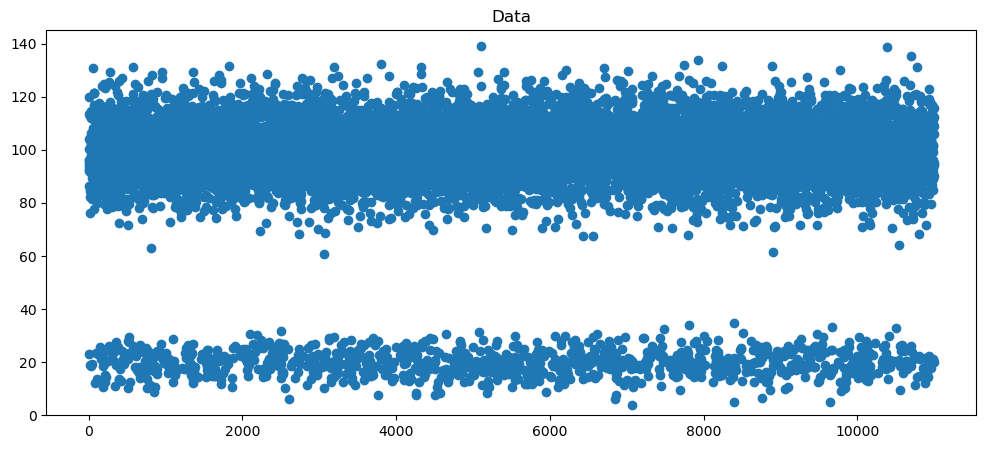

In [35]:
plt.figure(figsize=(12, 5))
plt.scatter(list(range(len(data))), data)
plt.ylim(0, 145)
plt.title("Data")
plt.show();

In [36]:
# Apply Local Outlier Factor (LOF) for outlier detection
clf = LocalOutlierFactor(n_neighbors=20, contamination="auto")
outlier_preds = clf.fit_predict(data)

In [37]:
normal_indices = np.where(outlier_preds == 1)

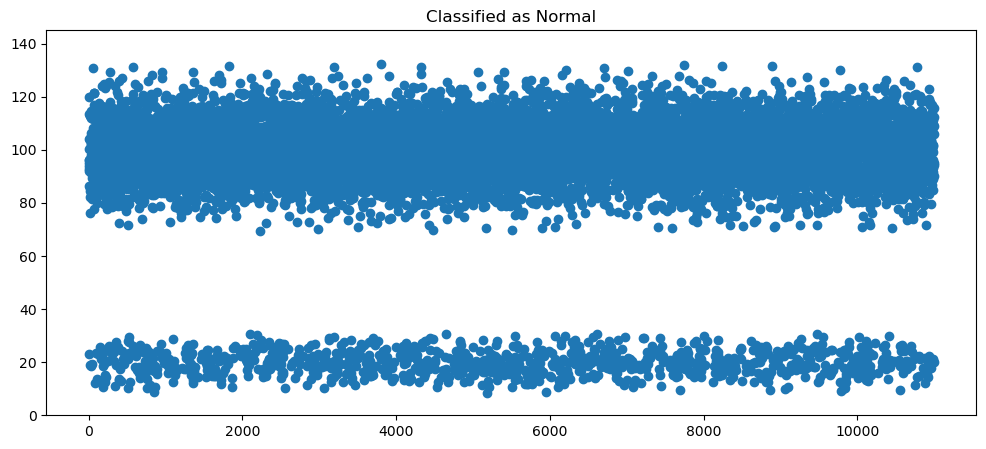

In [38]:
plt.figure(figsize=(12, 5))
plt.scatter(normal_indices[0], data[normal_indices[0]])
plt.ylim(0, 145)
plt.title("Classified as Normal")
plt.show();

In [39]:
# Identify outlier indices
outliers_indices = np.where(outlier_preds == -1)

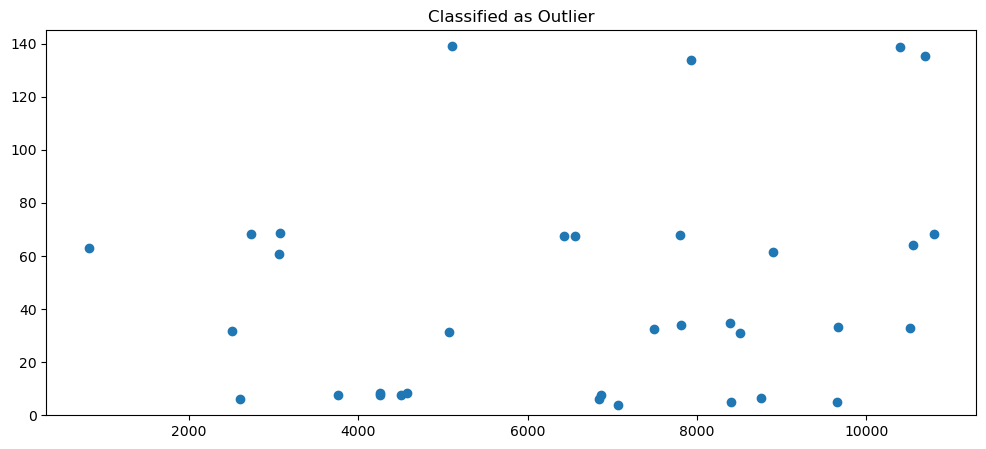

In [40]:
plt.figure(figsize=(12, 5))
plt.scatter(outliers_indices[0], data[outliers_indices[0]])
plt.ylim(0, 145)
plt.title("Classified as Outlier")
plt.show();

The parameters to tune, when applying the LOF algorithm, are the number of neighbors to consider for density estimation, and the contamination coefficient. The last one represents the expected proportion of outliers.

# 4. Conclusion

I presented three distinct approaches for Outlier Detection, each of them having advantages and limitations.

The Graphical Approach, with its visualization techniques like Scatter and Box Plots, is indubitably the most intuitive one and it is well-suited for initial data explorations. However, it may struggle with high-dimensional data and it lacks of numerical precision, making it only a qualitative tool.

This last downside of the Graphical Approach is compensated by the numerical robustness of the Statistical one. Methods like the Z-score offer a precise metric for the data anomaly score and explore more complex data relationships. The Statistical Approach is limited by the common assumption of normality distribution of the data, leading to some struggles with skewed data.

Finally, Machine Learning algorithms like the Isolation Forest are the cutting-edge approach as they are, in theory, more powerful than the Graphical and Statistical ones. They are state-of-the-art at understanding complex data spaces, where the pattern is difficult to find. These big qualities come with the limitation of parameter tuning.

This introduction is a good point to start from, however, it only scratches the surface of the Outlier Detection field. For those of you interested to deep dive into this field, I leave a list of interesting and insightful resources.